## Introduction to pandas

**pandas** is a Python library for analyzing and organizing tabular data. It's probably the most common library for working with both big and small datasets in Python, and is the basis for working with more analytical packages (e.g. scikit-learn) and analyzing geographic data (e.g. geopandas)

This notebook provides an intro to pandas for analyzing urban data. We'll be learning the following
- how to [load](#load) and [save](#save) datasets into pandas DataFrames
- computing [descriptive statistics](#descstats)
- [rename columns](#rename)
- [filtering](#filter) DataFrames
- generating [new columns](#newcol)
- [aggregating and summarizing](#aggsum) data by groups

In [2]:
# import pandas library
import pandas as pd

<a class="anchor" id="load"></a>
Let's first take a look at a small dataset, Canadian municipalities and their population in 2021 and 2016, based on Census data. In Statistics Canada lingo, these are called [Census Subdivisions](https://www12.statcan.gc.ca/census-recensement/2021/ref/dict/az/Definition-eng.cfm?ID=geo012). This dataset only includes municipalities with a population greater than 25,000 in 2021.

The main method for loading csv data is to use the [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function, but pandas can also read many other [data formats](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).

In [3]:
# read cities csv as df
df = pd.read_csv("cities.csv")

Great! Now our data should be loaded to a DataFrame called `df`. We can print this and explore. Adding the function `.head()` or `.tail()` prints the top or bottom rows of the DataFrame. i.e. the following prints the top 10 rows in the DataFrame

In [4]:
df.head(10)

,Name,Prov/terr,"Population, 2021","Population, 2016"
0,Abbotsford,B.C.,153524,141397
1,Airdrie,Alta.,74100,61581
2,Ajax,Ont.,126666,119677
3,Alma,Que.,30331,30771
4,Aurora,Ont.,62057,55445
5,Barrie,Ont.,147829,141434
6,Belleville,Ont.,55071,50716
7,Blainville,Que.,59819,56863
8,Boisbriand,Que.,28308,26884
9,Boucherville,Que.,41743,41671


<a class="anchor" id="descstats"></a>
Let's take a look at the descriptive statistics of our variables using the `.describe()` method.

In [5]:
df.describe()

,"Population, 2021","Population, 2016"
count,1.790000e+02,1.790000e+02
mean,1.502916e+05,1.420523e+05
std,2.981346e+05,2.869997e+05
min,2.554500e+04,2.378700e+04
25%,3.648150e+04,3.400900e+04
50%,6.311600e+04,6.116100e+04
75%,1.295755e+05,1.157165e+05
max,2.794356e+06,2.731571e+06


We add the `include = "object"` argument to look at some summary statistics of our qualitative variables.

In [6]:
df.describe(include = 'object')

,Name,Prov/terr
count,179,179
unique,177,11
top,Langley,Ont.
freq,2,69


We can also use the `.value_counts()` method to observe the distribution of our qualitative variables...

In [7]:
qual_dist = df["Prov/terr"].value_counts()
qual_dist

Prov/terr
Ont.      69
Que.      45
B.C.      31
Alta.     17
N.B.       4
Sask.      4
N.S.       3
Man.       2
N.L.       2
P.E.I.     1
Y.T.       1
Name: count, dtype: int64

... And visualize it!

<Axes: xlabel='Prov/terr'>

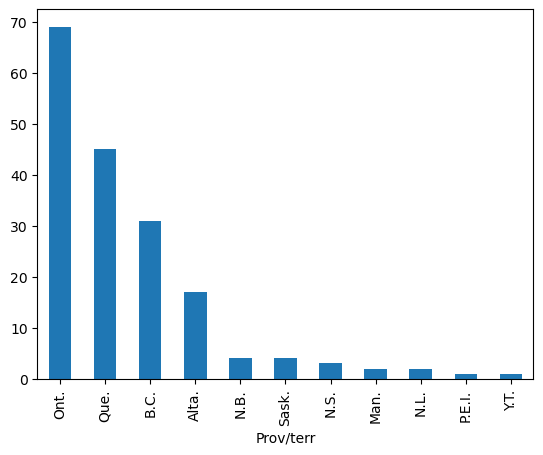

In [8]:
qual_dist.plot(kind = "bar")

pandas has a number of functions for **manipulating** DataFrames like this. <br>

<a class="anchor" id="rename"></a>
For example, the column names in this dataframe are lengthy. Let's rename these columns to something that's easier to work with.


In [9]:
# name_dictionary = {old_name : new_name, ...}
newNames = {'Name' : 'city',
           'Prov/terr' : 'prov',
           "Population, 2021": 'pop21',
           "Population, 2016" : 'pop16'}

df.rename(columns = newNames, inplace = True)

df

,city,prov,pop21,pop16
0,Abbotsford,B.C.,153524,141397
1,Airdrie,Alta.,74100,61581
2,Ajax,Ont.,126666,119677
3,Alma,Que.,30331,30771
4,Aurora,Ont.,62057,55445
...,...,...,...,...
174,Windsor,Ont.,229660,217188
175,Winnipeg,Man.,749607,705244
176,Wood Buffalo,Alta.,72326,71594
177,Woodstock,Ont.,46705,41098


Also, it looks like the data are are sorted by their name, but what if we wanted to sort by `pop21`? We can use the [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html?highlight=sort_values#pandas.DataFrame.sort_values) function.

The default is to sort in ascending order, so we set this to be `False` (i.e. descending) so the most populous cities are at the top.

In [10]:
df.sort_values('pop21', ascending = False).head(5)

,city,prov,pop21,pop16
158,Toronto,Ont.,2794356,2731571
89,Montréal,Que.,1762949,1704694
19,Calgary,Alta.,1306784,1239220
106,Ottawa,Ont.,1017449,934243
42,Edmonton,Alta.,1010899,933088


<a class="anchor" id="filter"></a>
We can also easily filter the DataFrame. Let's show only municipalities in Ontario. 

In [11]:
df.loc[df["prov"] == "Ont."].sort_values('pop21', ascending = False).head(8)
# find rows in df where the Prov/terr value is "Ont"
# then sort the values by 2021 Population from high to low
# show the top 8 most populous cities

,city,prov,pop21,pop16
158,Toronto,Ont.,2794356,2731571
106,Ottawa,Ont.,1017449,934243
87,Mississauga,Ont.,717961,721599
11,Brampton,Ont.,656480,593638
56,Hamilton,Ont.,569353,536917
76,London,Ont.,422324,383822
81,Markham,Ont.,338503,328966
163,Vaughan,Ont.,323103,306233


Looks like their are only these 4! You can try filtering for other provinces. If you want to get a list of all the provinces in the dataset, we can run the `unique()` function on the series.

In [12]:
df["prov"].unique()

array(['B.C.', 'Alta.', 'Ont.', 'Que.', 'Man.', 'N.S.', 'P.E.I.', 'N.L.',
       'N.B.', 'Sask.', 'Y.T.'], dtype=object)

We can query by any of these 11. (There are no municipalities in Northwest Territories and Nunavut with a population greater than 25,000). 

We can also filter on more than one column, for example, let's try to find all the municipalities in Ontario that have a population greater than 500,000.

In [13]:
df.loc[(df["prov"] == "Ont.") & (df["pop21"] >= 500000)]

,city,prov,pop21,pop16
11,Brampton,Ont.,656480,593638
56,Hamilton,Ont.,569353,536917
87,Mississauga,Ont.,717961,721599
106,Ottawa,Ont.,1017449,934243
158,Toronto,Ont.,2794356,2731571


<a class="anchor" id="newcol"></a>
The DataFrame isn't static. We can add or delete columns as needed. Let's first add a column which shows the change in population between 2021 and 2016 and then sort by the cities that lost the most people.

In [14]:
df["popChange_1621"] = df["pop21"] - df["pop16"]
df.sort_values("popChange_1621").tail(5)

,city,prov,pop21,pop16,popChange_1621
158,Toronto,Ont.,2794356,2731571,62785
11,Brampton,Ont.,656480,593638,62842
19,Calgary,Alta.,1306784,1239220,67564
42,Edmonton,Alta.,1010899,933088,77811
106,Ottawa,Ont.,1017449,934243,83206


If we don't want to keep this column, we can just delete it as follows. If you run this cell more than once, i.e. after deleting it, you'll probably get an error saying there is nothing to delete. <br>

_Hint: Look at the bottom line of error message to find what is throwing the error_

In [15]:
del df["popChange_1621"]

<a class="anchor" id="aggsum"></a>

Another particularly useful function in pandas is to group by and summarize data. 

For example, if we want to simply count how many municipalities in each province there are in the dataset we can use the `groupby` and `size` functions.

We use the .reset_index() method to convert the resulting Series back to a DataFrame and give the resulting column a name of 'count'

In [16]:
df.groupby("prov").size().reset_index(name='count')

,prov,count
0,Alta.,17
1,B.C.,31
2,Man.,2
3,N.B.,4
4,N.L.,2
5,N.S.,3
6,Ont.,69
7,P.E.I.,1
8,Que.,45
9,Sask.,4


We can chain this to other filters, for example, how many cities in each province have a population greater than 500,000?

In [17]:
df.loc[df["pop21"] >= 500000].groupby("prov").size().reset_index(name='count')

,prov,count
0,Alta.,2
1,B.C.,2
2,Man.,1
3,Ont.,5
4,Que.,2


Great! Let's wrap by asking a bit more of an analytical question. 

What's the average percent change in population between 2016 and 2021 by province?

In [18]:
df["popChange_1621"] = 100 * (df["pop21"] - df["pop16"]) / df["pop16"]

dfa = df.groupby('prov')['popChange_1621'].mean().reset_index(name='avg').sort_values('avg')

dfa

,prov,avg
4,N.L.,2.614051
5,N.S.,3.738991
9,Sask.,4.321345
8,Que.,4.475347
2,Man.,5.630750
0,Alta.,6.849864
7,P.E.I.,7.522026
6,Ont.,8.008899
3,N.B.,8.054500
1,B.C.,8.739919


<a class="anchor" id="save"></a>
If we want, we can save this table to a local csv file if to share with others or use in another analysis. `index = False` means that only the two data variables are saved, not the index on the left.

In [19]:
# dfa.to_csv("avg_pop_change_by_prov.csv", index = False)

# Common Pandas Errors

In [22]:
df("name")
# Google this error together

TypeError: 'DataFrame' object is not callable

In [21]:
df["PopChange_1621"]
#solve the rest of these errors in groups

KeyError: 'PopChange_1621'

In [23]:
df.sort_values()

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [24]:
df.loc['prov']

KeyError: 'prov'

In [20]:
newName2 = {'Name' : 'city_name'}

df.rename(columns = newName2)

df

,city,prov,pop21,pop16,popChange_1621
0,Abbotsford,B.C.,153524,141397,8.576561
1,Airdrie,Alta.,74100,61581,20.329322
2,Ajax,Ont.,126666,119677,5.839886
3,Alma,Que.,30331,30771,-1.429918
4,Aurora,Ont.,62057,55445,11.925331
...,...,...,...,...,...
174,Windsor,Ont.,229660,217188,5.742490
175,Winnipeg,Man.,749607,705244,6.290447
176,Wood Buffalo,Alta.,72326,71594,1.022432
177,Woodstock,Ont.,46705,41098,13.643000
